In [1]:
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
train1 = pd.read_csv('train.csv')
train1.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874855,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [3]:
choices = train1['Choice']
train1 = train1.drop('Choice', axis=1)

---

# Preprocessing



### Derive New Features

We have 11 features for A and the same 11 features for B. Since we are trying to predict if A > B, let's derive some new features by taking the difference (A - B) and ratio (A / B) between the original features of A and B.

In [4]:
train_dict = train1.to_dict()
train2 = train1.replace(0,0.01)

for i in range(0,11):
    colA = train2.columns[i]
    colB = train2.columns[i+11]
    diff_col = train2[colA] - train2[colB]
    ratio_col = train2[colA] / train2[colB]
    train_dict[colA + ' - ' + colB] = diff_col
    train_dict[colA + ':' + colB] = ratio_col

train2 = pd.DataFrame(train_dict)
train2.describe()

,A_follower_count,A_follower_count - B_follower_count,A_follower_count:B_follower_count,A_following_count,A_following_count - B_following_count,A_following_count:B_following_count,A_listed_count,A_listed_count - B_listed_count,A_listed_count:B_listed_count,A_mentions_received,...,B_following_count,B_listed_count,B_mentions_received,B_mentions_sent,B_network_feature_1,B_network_feature_2,B_network_feature_3,B_posts,B_retweets_received,B_retweets_sent
count,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5.500000e+03,5.500000e+03,5500.000000,5500.000000,5.500000e+03,5.500000e+03,...,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,6.498840e+05,-3.560291e+04,609.063937,1.265895e+04,-7.931036e+01,4.438566e+03,5952.453273,49.304935,3.500537e+03,2.666032e+03,...,12738.259818,5903.148364,2.554598e+03,6.099658,5254.933636,85.024196,3745.175480,9.505821,997.149954,1.106236
std,2.028787e+06,2.724394e+06,9180.138456,4.900867e+04,7.043435e+04,1.239164e+05,17339.141191,21248.786102,7.800600e+04,2.916543e+04,...,50054.520874,16298.462018,2.508873e+04,9.729557,26778.820125,106.689384,5518.399590,19.424680,9342.006880,1.939914
min,1.600000e+01,-3.619107e+07,0.000004,0.000000e+00,-6.643230e+05,3.619896e-08,0.000000,-544716.000000,2.602472e-07,1.005034e-01,...,0.000000,0.000000,1.005034e-01,0.100503,0.000000,0.000000,0.000000,0.100503,0.100503,0.100503
25%,2.663750e+03,-1.838008e+05,0.062139,3.220000e+02,-1.384750e+03,1.791136e-01,85.000000,-3477.250000,8.204292e-02,3.453649e+00,...,322.000000,75.000000,3.260473e+00,0.356943,11.000000,15.176568,1206.500000,0.822584,0.714556,0.100503
50%,4.558900e+04,1.500000e+01,1.014562,7.780000e+02,1.600000e+01,1.039476e+00,932.000000,5.995000,1.075984e+00,4.876542e+01,...,773.000000,890.000000,4.876542e+01,2.251398,190.000000,54.925234,2206.420734,3.342999,14.029113,0.341936
75%,3.927380e+05,1.779708e+05,17.551299,2.838000e+03,1.501000e+03,5.938035e+00,6734.000000,3638.500000,1.316297e+01,3.498196e+02,...,2838.000000,6734.000000,3.743699e+02,6.866840,1323.000000,112.191489,4349.908608,10.600502,107.081021,1.320681
max,3.654319e+07,3.506800e+07,477141.000000,1.165830e+06,1.162212e+06,5.657100e+06,549144.000000,518386.000000,3.062200e+06,1.145219e+06,...,664324.000000,549144.000000,1.145219e+06,76.809514,920838.000000,1861.583333,75526.083330,193.072418,435825.874200,16.290540


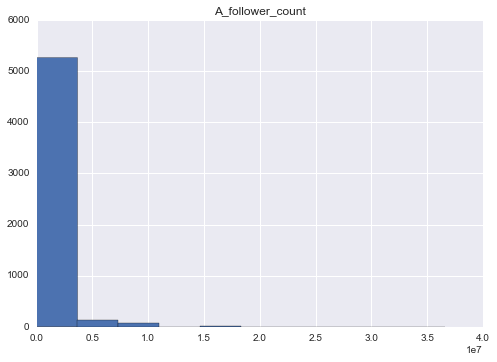

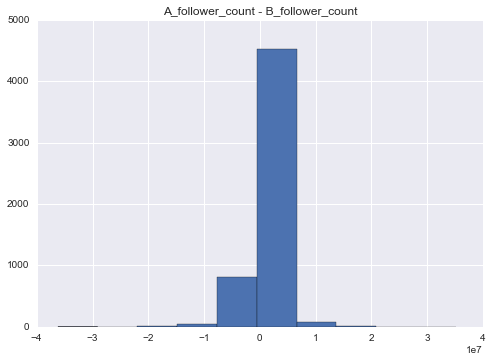

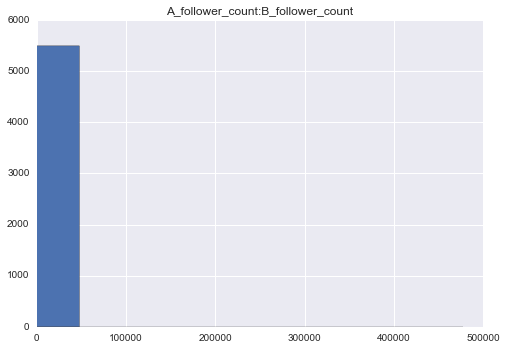

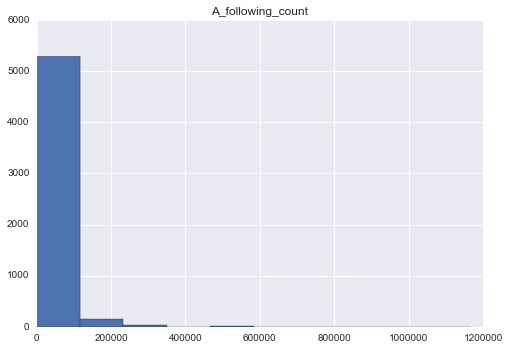

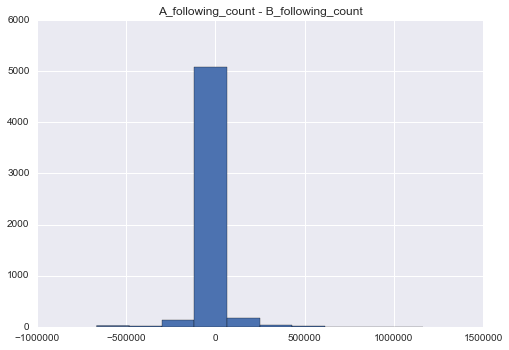

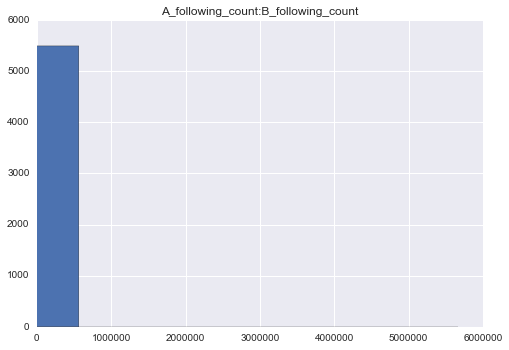

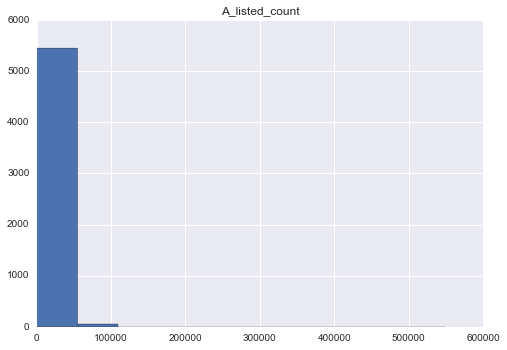

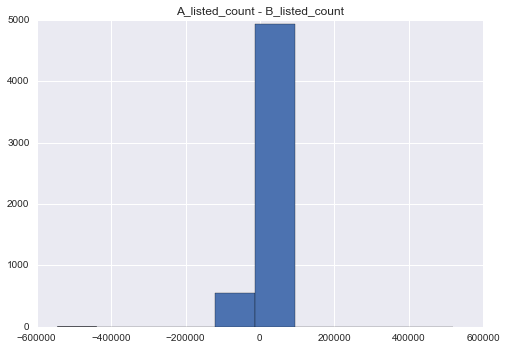

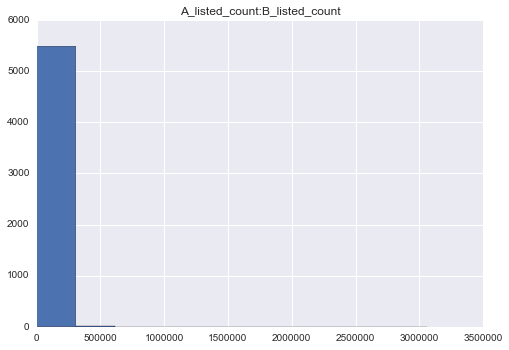

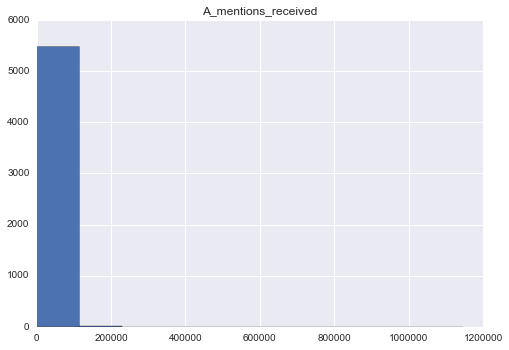

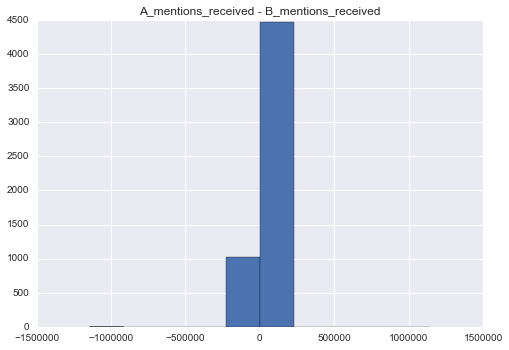

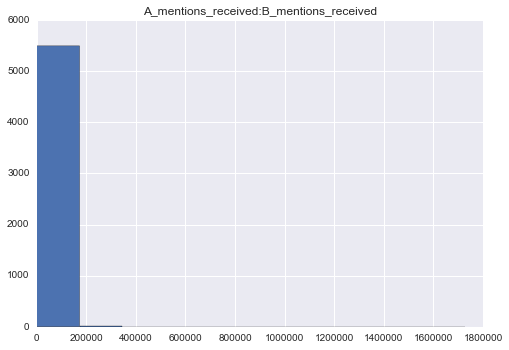

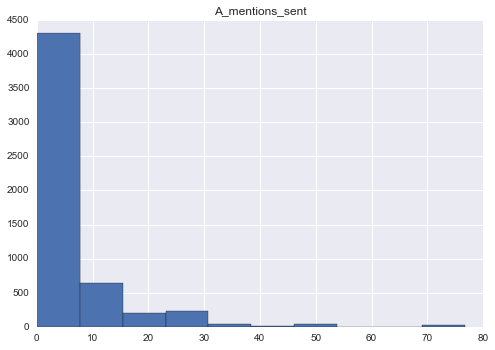

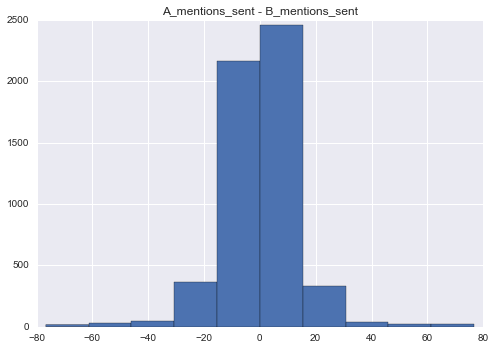

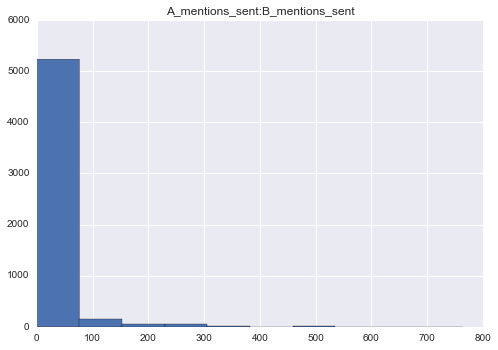

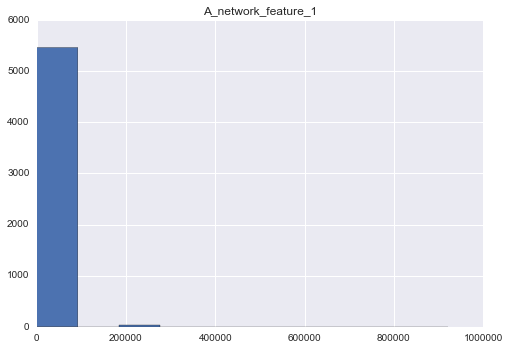

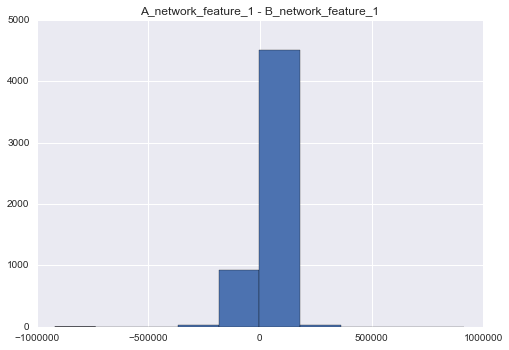

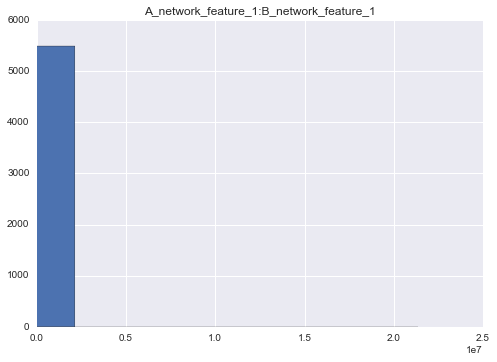

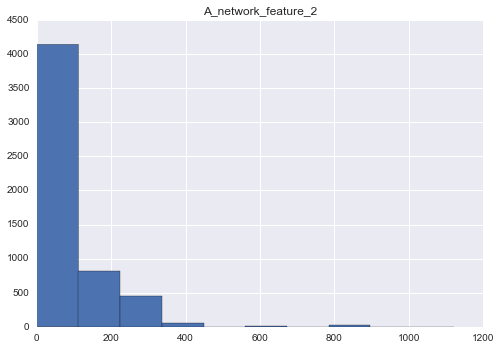

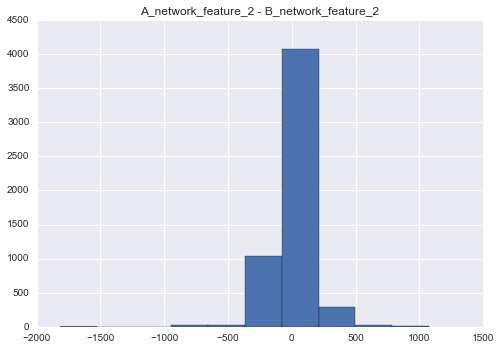

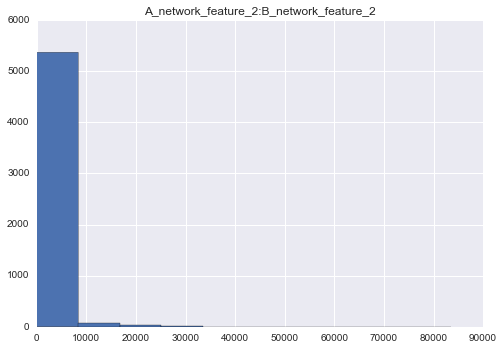

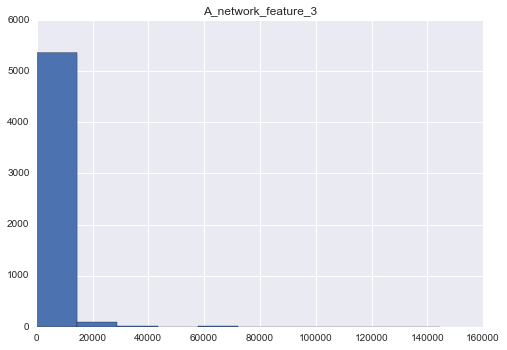

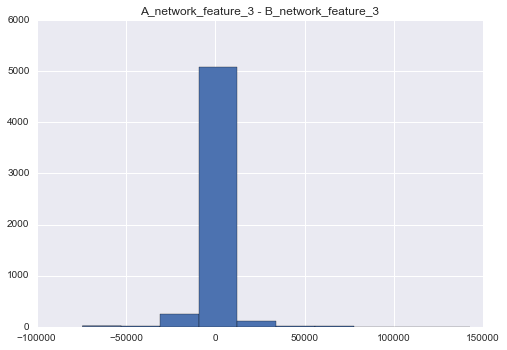

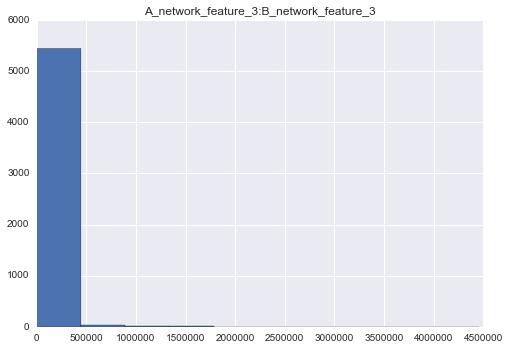

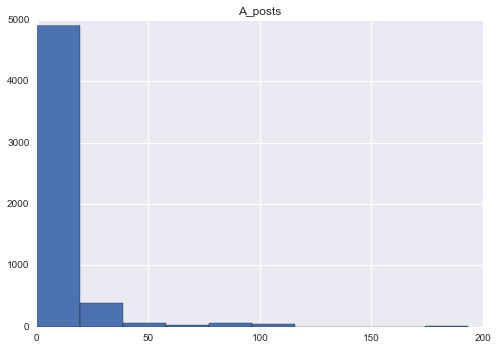

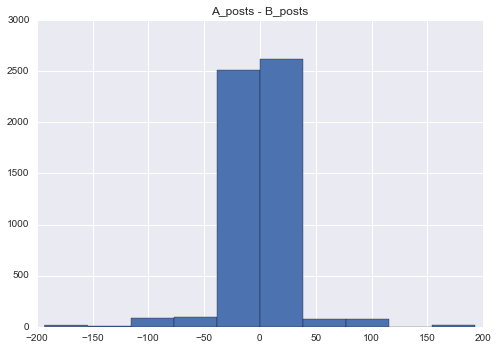

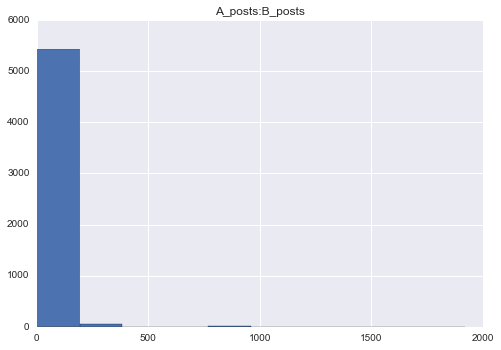

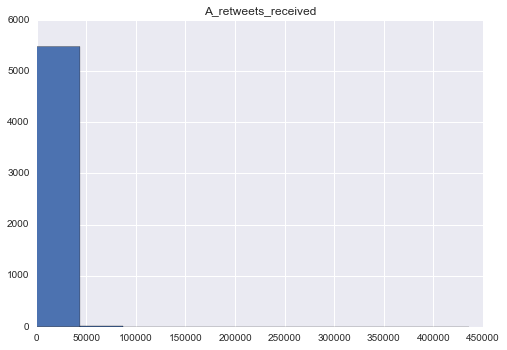

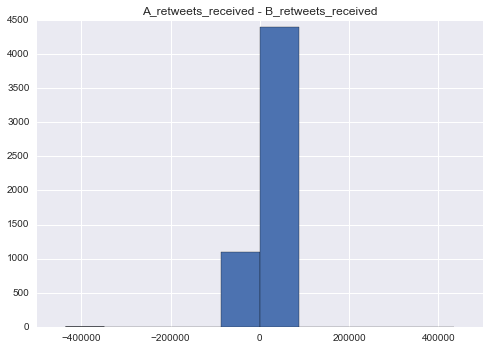

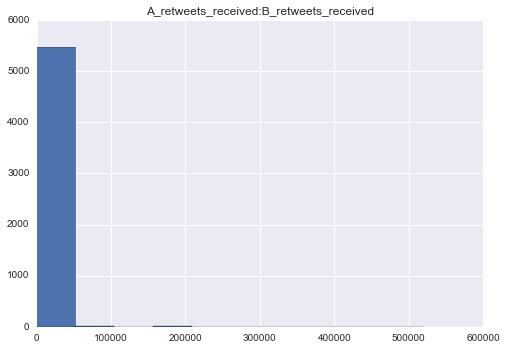

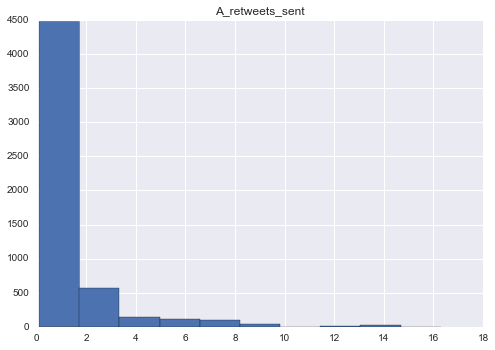

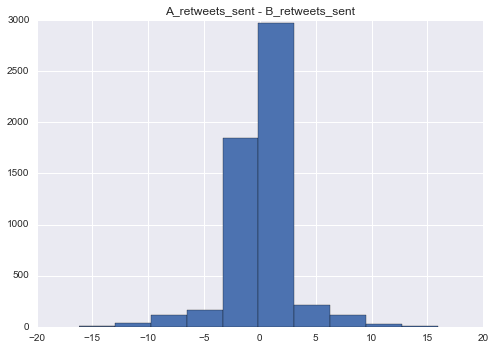

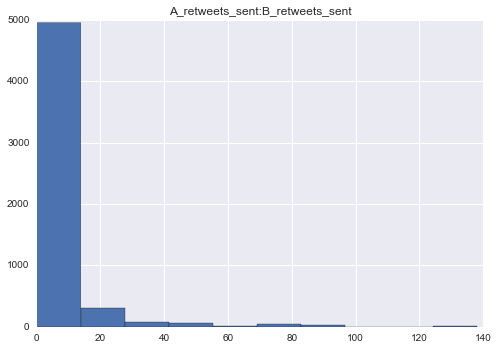

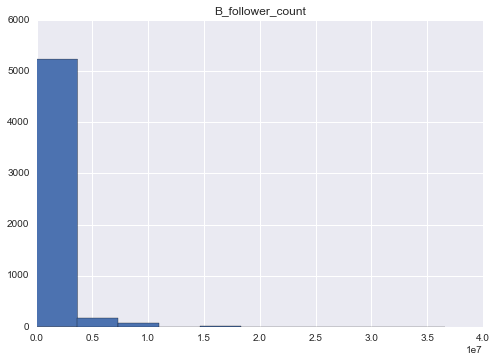

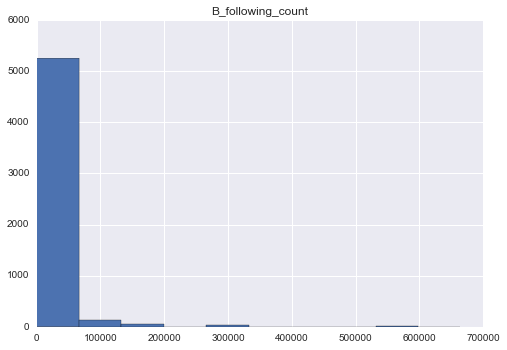

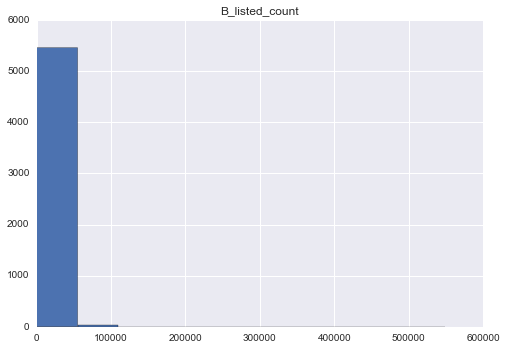

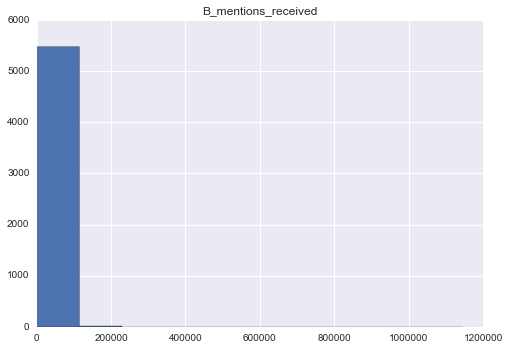

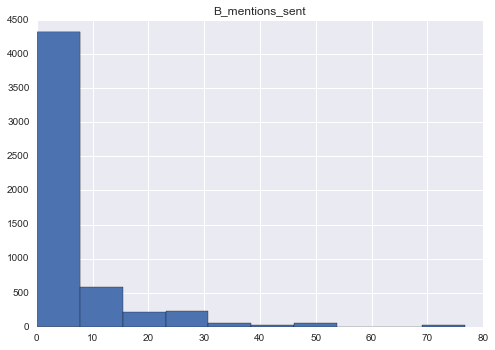

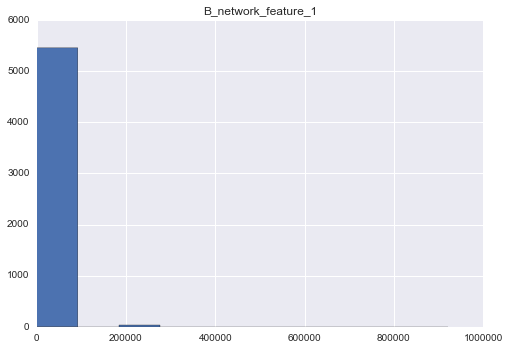

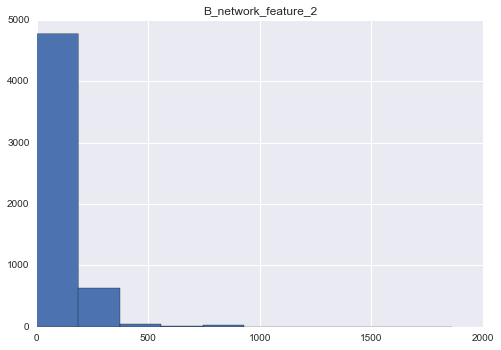

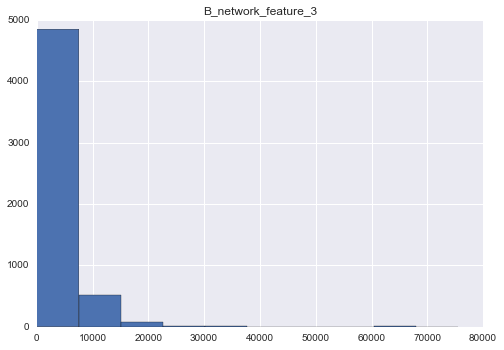

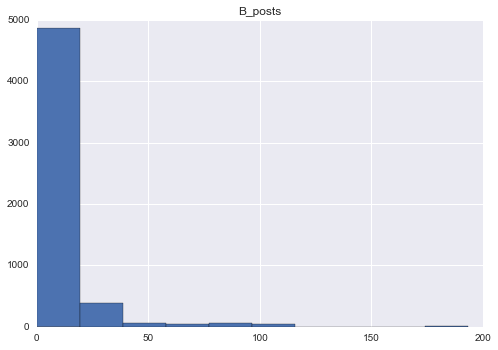

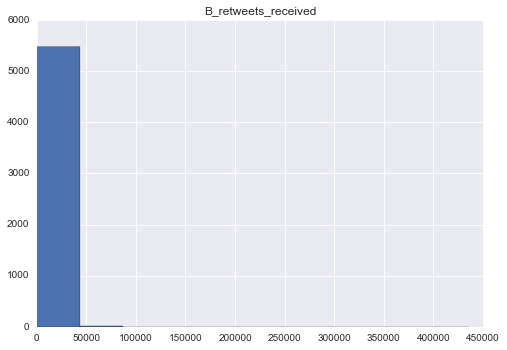

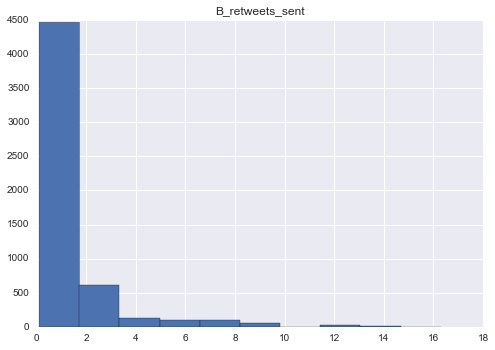

In [5]:
# Plot histograms for each feature
for column in train2.columns:
    train2[column].hist()
    plt.title(column)
    plt.show()

### Log Transform
A lot of our features seem to be skewed pretty heavily. Let's try a log transformation of these features to make their distributions look more normal.

Note: Features representing the difference between A and B (A - B Features) will not be transformed since a large amount of their values are negative

In [6]:
train2.columns

Index([u'A_follower_count', u'A_follower_count - B_follower_count',
       u'A_follower_count:B_follower_count', u'A_following_count',
       u'A_following_count - B_following_count',
       u'A_following_count:B_following_count', u'A_listed_count',
       u'A_listed_count - B_listed_count', u'A_listed_count:B_listed_count',
       u'A_mentions_received', u'A_mentions_received - B_mentions_received',
       u'A_mentions_received:B_mentions_received', u'A_mentions_sent',
       u'A_mentions_sent - B_mentions_sent',
       u'A_mentions_sent:B_mentions_sent', u'A_network_feature_1',
       u'A_network_feature_1 - B_network_feature_1',
       u'A_network_feature_1:B_network_feature_1', u'A_network_feature_2',
       u'A_network_feature_2 - B_network_feature_2',
       u'A_network_feature_2:B_network_feature_2', u'A_network_feature_3',
       u'A_network_feature_3 - B_network_feature_3',
       u'A_network_feature_3:B_network_feature_3', u'A_posts',
       u'A_posts - B_posts', u'A_posts:B_

In [7]:
train3 = train2

for i in range(0,33,3):
    col = train3.columns[i]
    train3[col] = train3[col].replace(0,.01)
    train3[col] = np.log(train3[col])

for i in range(2,33,3):
    col = train3.columns[i]
    train3[col] = train3[col].replace(0,.01)
    train3[col] = np.log(train3[col])

for i in range(33, len(train3.columns)):
    col = train3.columns[i]
    train3[col] = train3[col].replace(0,.01)
    train3[col] = np.log(train3[col])

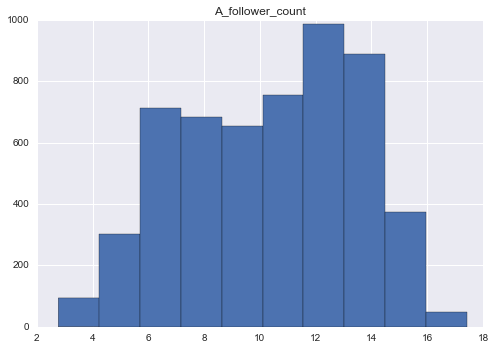

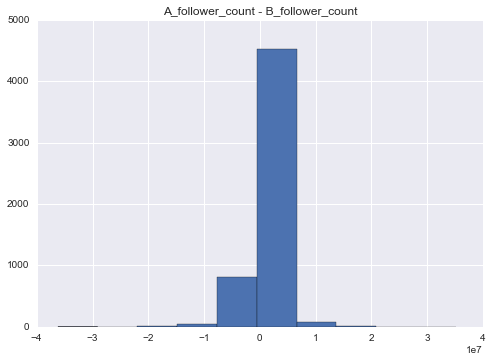

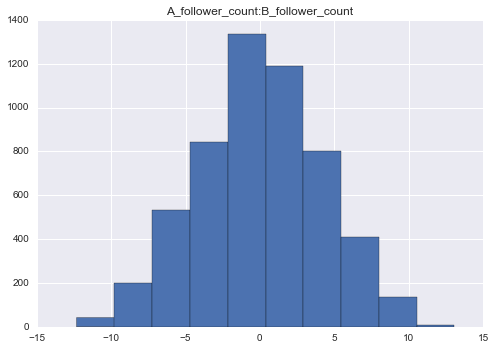

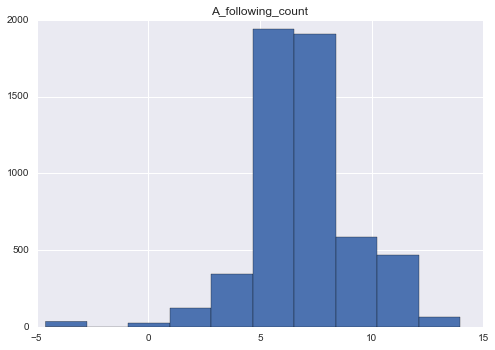

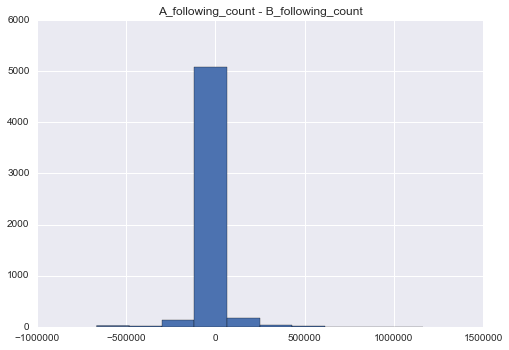

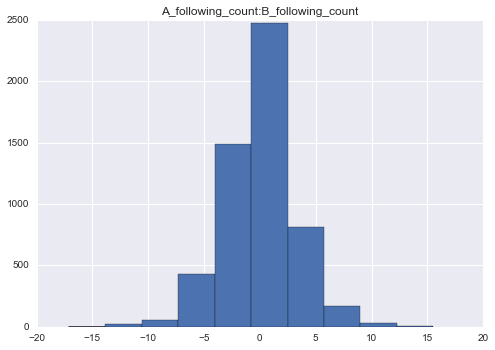

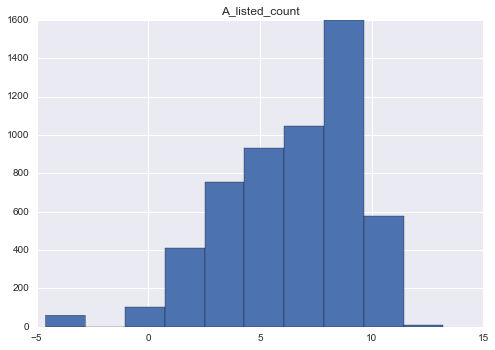

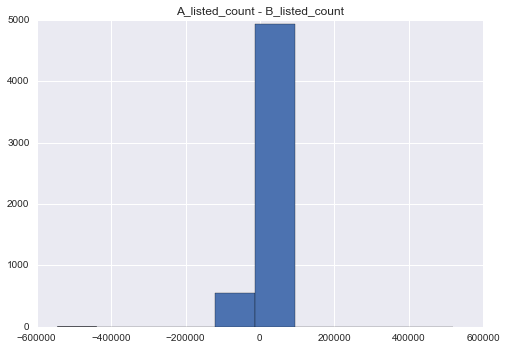

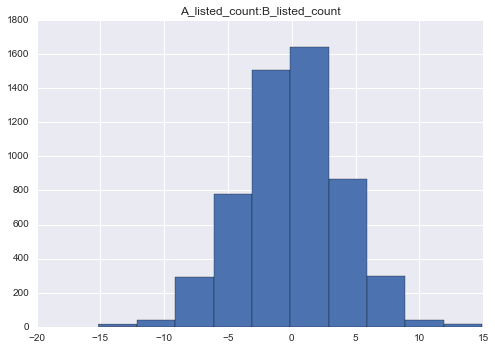

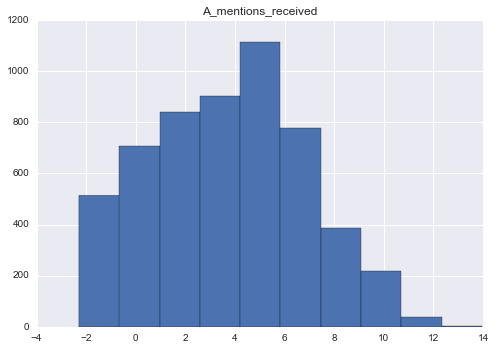

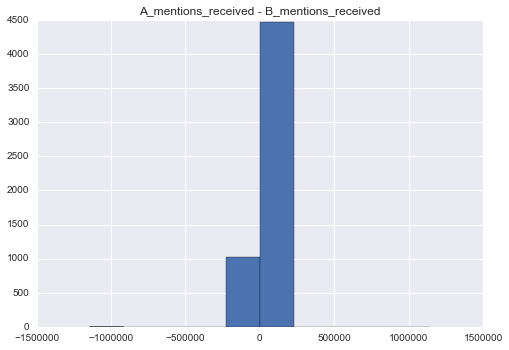

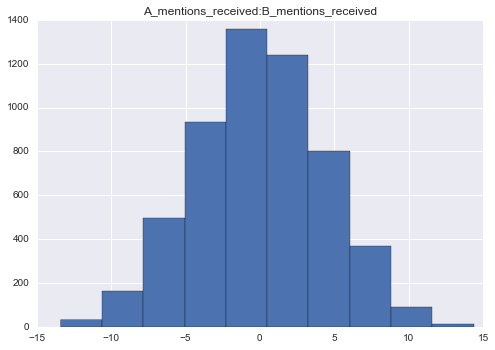

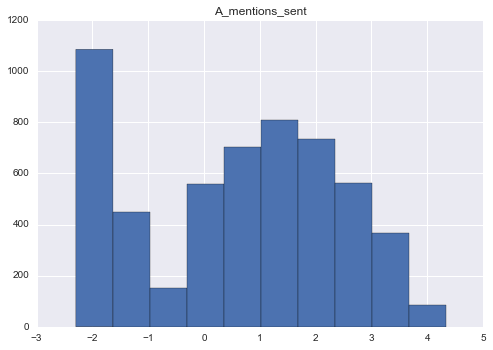

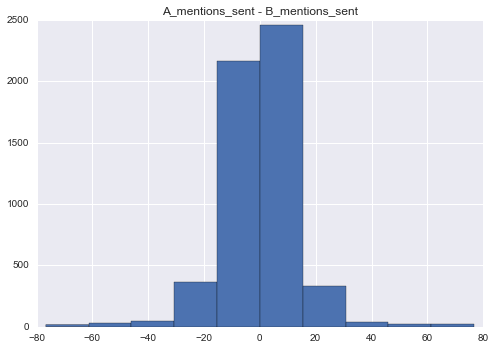

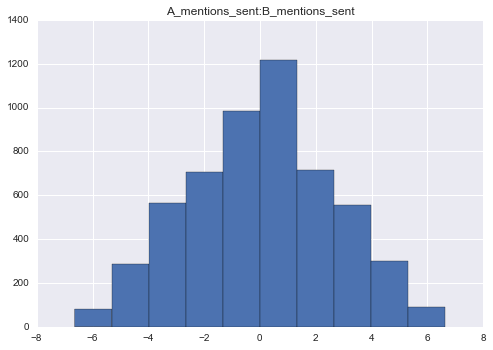

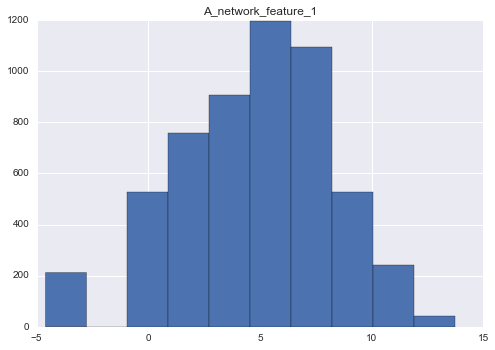

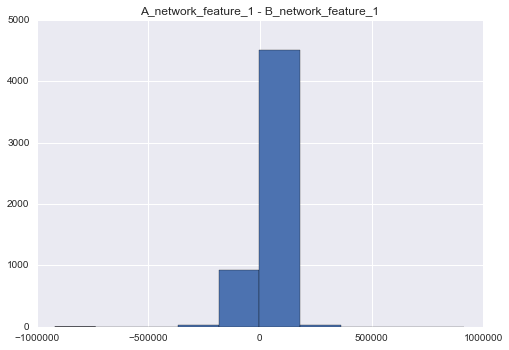

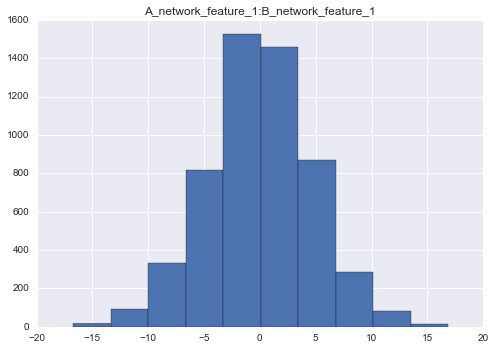

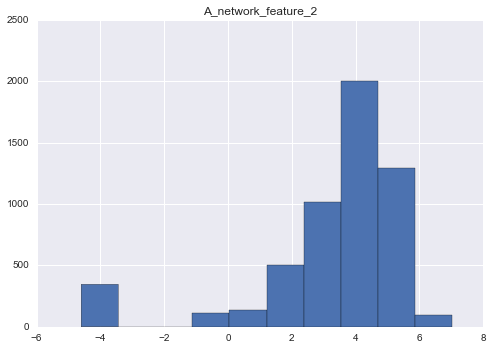

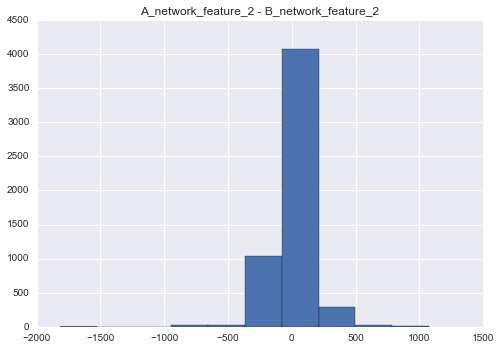

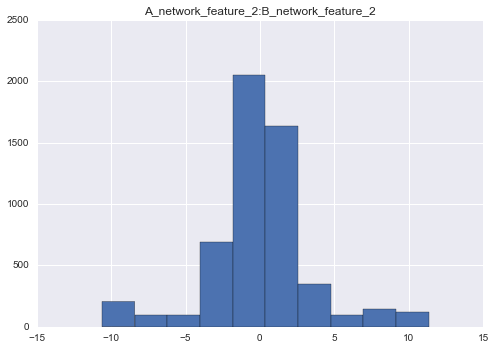

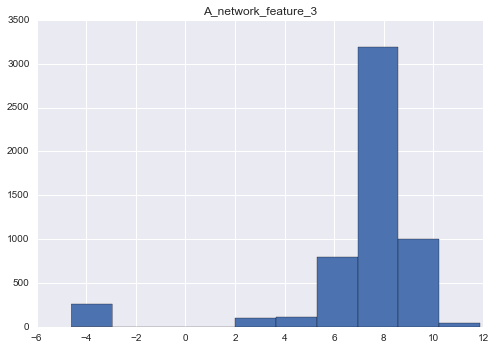

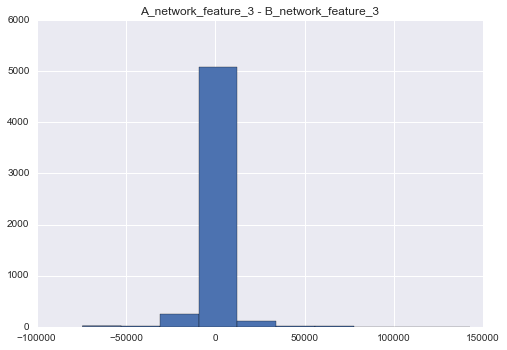

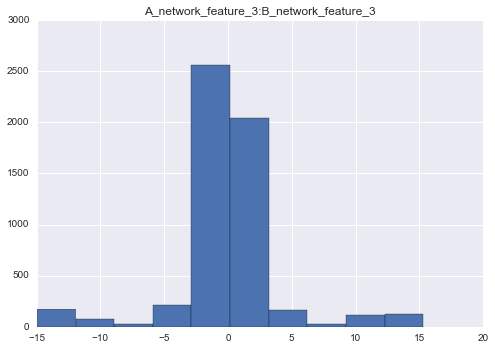

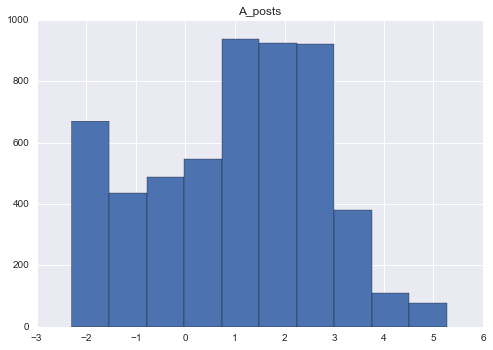

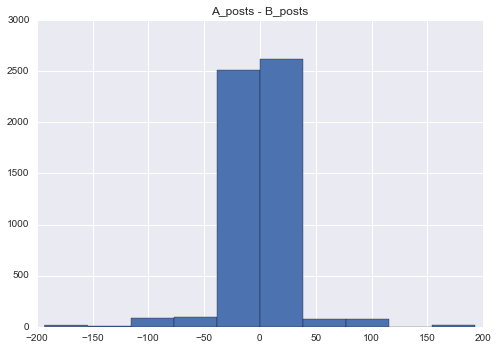

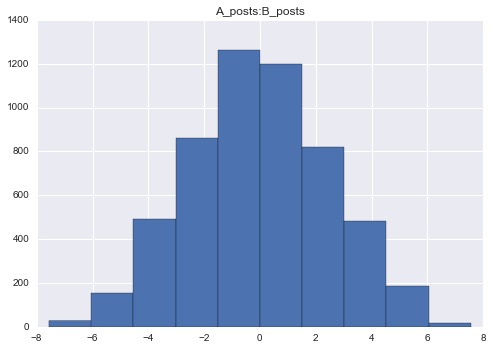

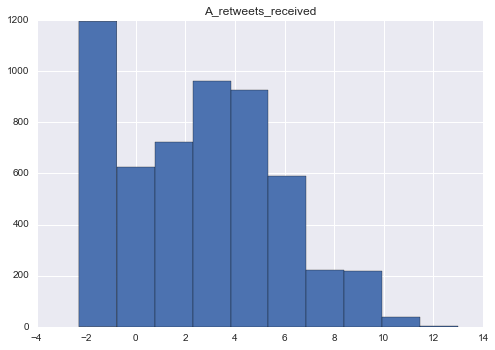

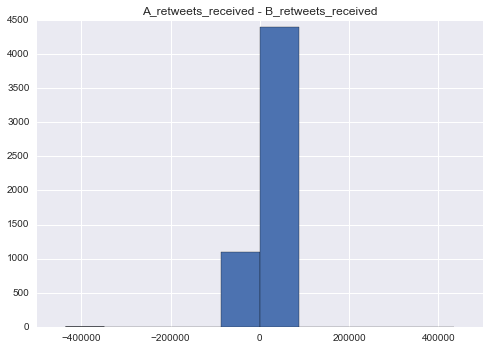

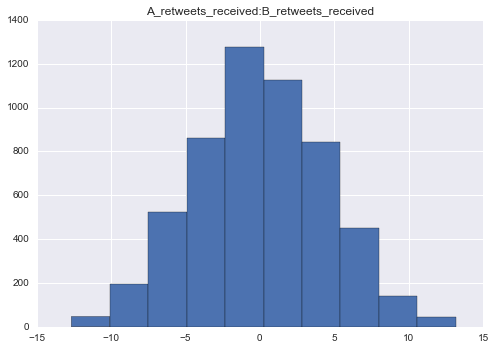

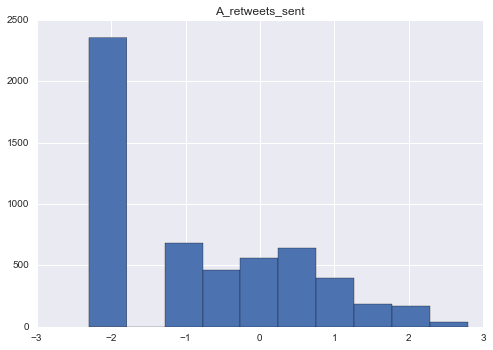

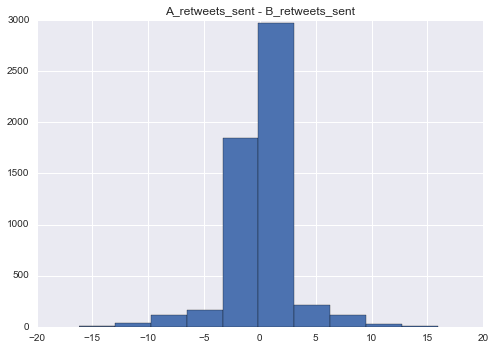

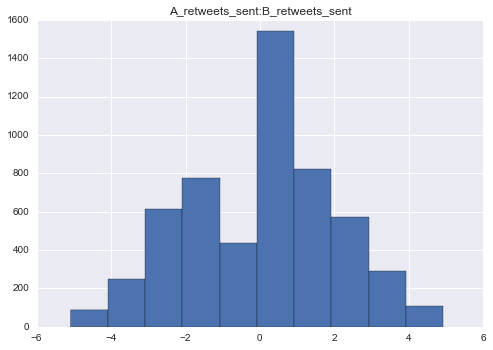

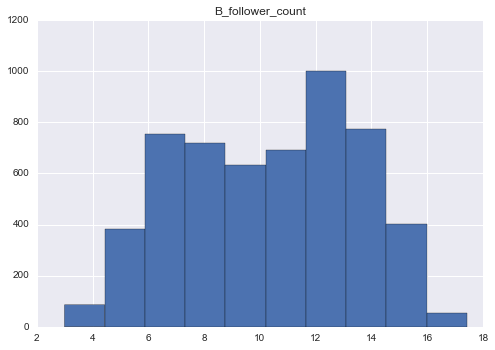

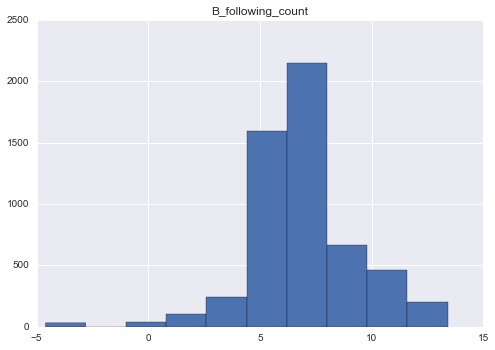

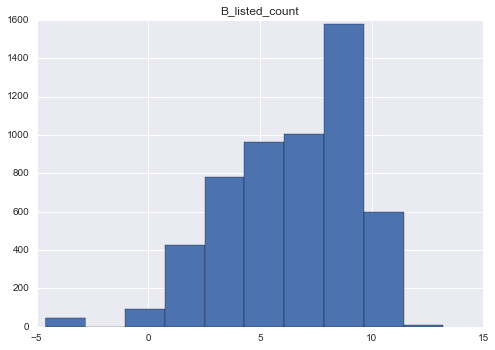

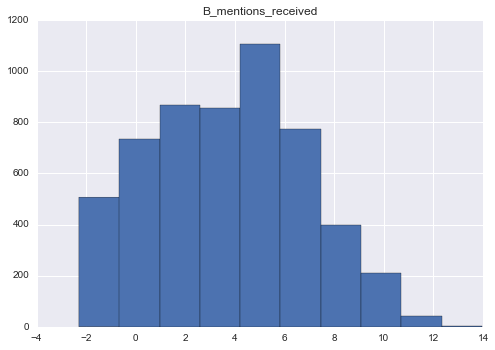

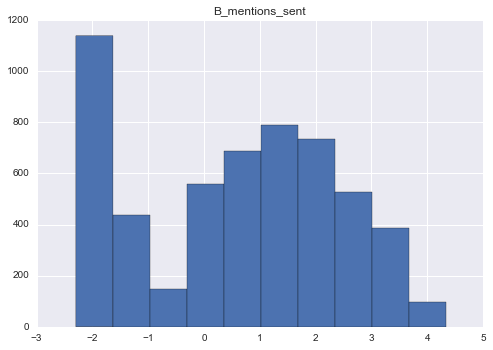

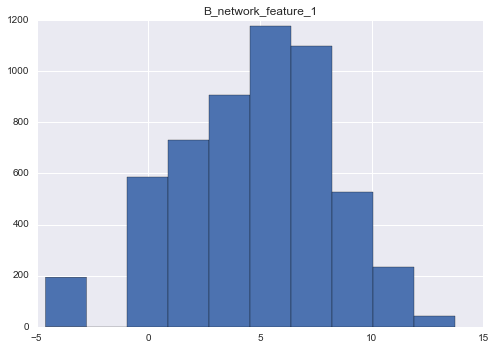

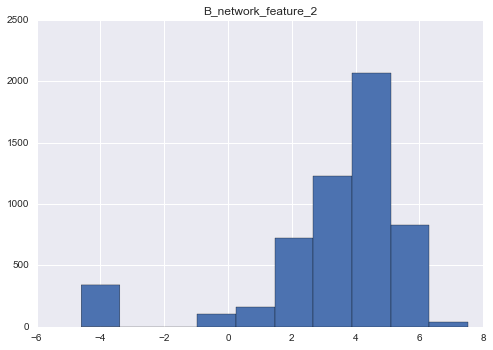

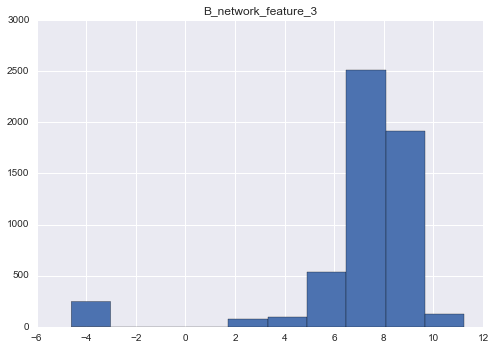

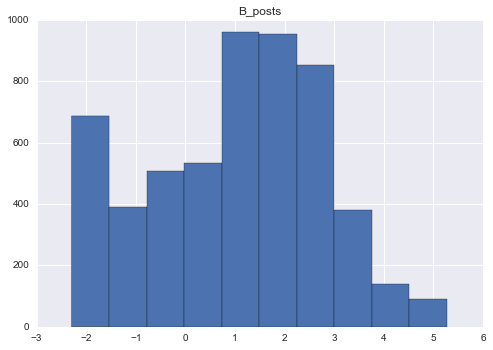

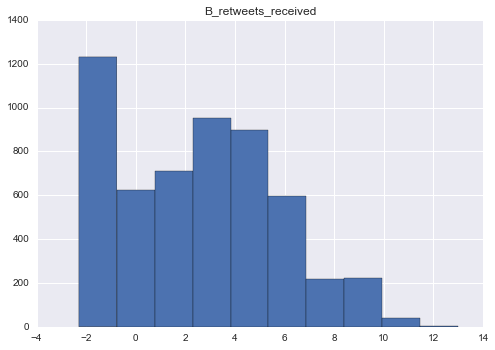

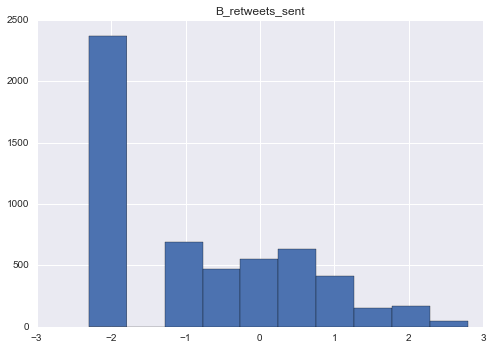

In [8]:
# Plot histograms for each feature
for column in train3.columns:
    train3[column].hist()
    plt.title(column)
    plt.show()

### Standardize data

Finally, let's standardize the data so that each feature has a mean of 0 and a standard deviation of 1.

In [9]:
train4 = (train3 - train3.mean()) / train3.std()
train4['Choice'] = choices

In [10]:
from sklearn.model_selection import train_test_split

X = train4.drop('Choice', axis=1)
y = train4['Choice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
def extract_probs(probs_array):
    probs_neg = []
    probs_pos = []
    for row in probs_array:
        probs_neg.append(row[0])
        probs_pos.append(row[1])
    
    return probs_pos, probs_neg

---

# Gradient Boost

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Use cross validation to optimize parameters
## Define paramater grid
param_grid = {'learning_rate': [0.01, .1, 1], 'max_depth': [3, 5, 7]}

## Cross validate, fit to data using optimal paramaters
gb_cv = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=10)
gb_cv.fit(X_train, y_train)

print 'Optimal Paramaters:'
print '\tLearning Rate\t:\t{}'.format(gb_cv.best_params_['learning_rate'])
print '\tMax Depth\t:\t{}'.format(gb_cv.best_params_['max_depth'])

Optimal Paramaters:
	Learning Rate	:	0.1
	Max Depth	:	5


In [13]:
# Fit model using optimal parameters
gb = GradientBoostingClassifier(learning_rate=gb_cv.best_params_['learning_rate'], max_depth=gb_cv.best_params_['max_depth'])
gb.fit(X_train, y_train)

# Predict on test set
gb_predict = gb.predict(X_test)

# Extract probabilities for each test observation
gb_probs = gb.predict_proba(X_test)
gb_probsPos, gb_probsNeg = extract_probs(gb_probs)

print 'Prediction Accuracy\t:\t{}%'.format(gb.score(X_test, y_test)*100)

Prediction Accuracy	:	77.5757575758%


### Confusion Matrix

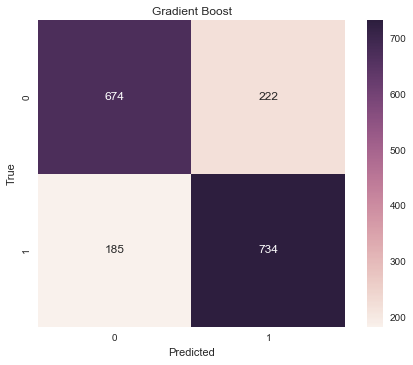

In [14]:
# Confusion matrix on test data
conf_mat = confusion_matrix(y_test, gb_predict)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, xticklabels=unique(y_test), 
            yticklabels=unique(gb_predict))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gradient Boost')

### Feature Importance

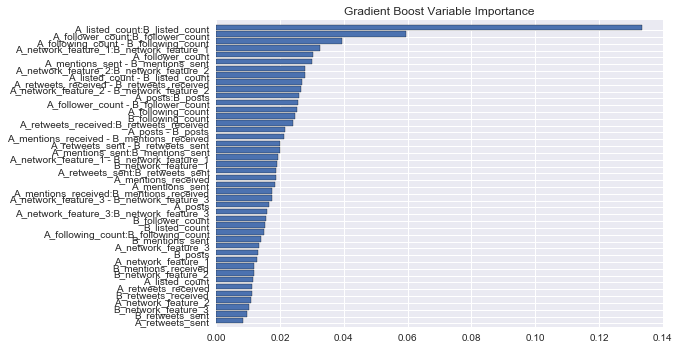

In [15]:
feature_importance = gb.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, X_train[sorted_idx])
plt.title('Gradient Boost Variable Importance')
plt.show()

---

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

rf_probs = rf.predict_proba(X_test)
rf_probsPos, rf_probsNeg = extract_probs(rf_probs)

print 'Prediction Accuracy\t:\t{}%'.format(rf.score(X_test, y_test)*100)

Prediction Accuracy	:	75.5371900826%


### Confusion Matrix

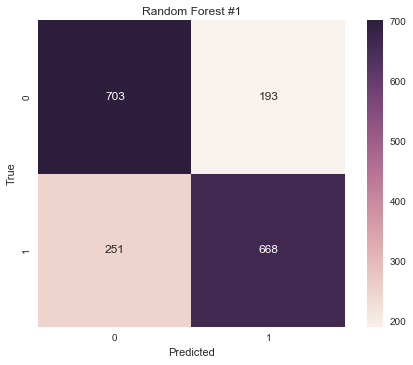

In [17]:
# Confusion matrix on test data
conf_mat = confusion_matrix(y_test, rf_predict)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, xticklabels=unique(y_test), 
            yticklabels=unique(rf_predict))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest #1')

### Feature Importance

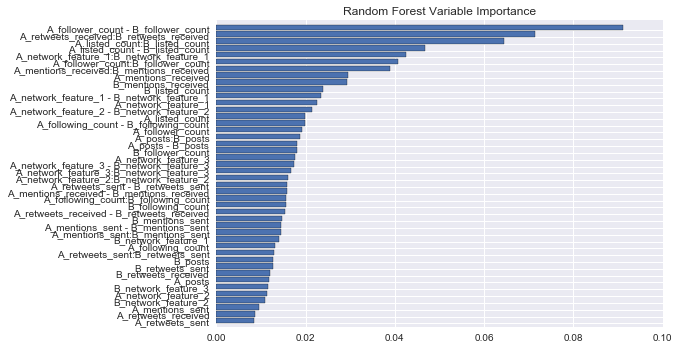

In [18]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, X_train[sorted_idx])
plt.title('Random Forest Variable Importance')
plt.show()

---

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_predict = logit.predict(X_test)

logit_probs = logit.predict_proba(X_test)
logit_probsPos, logit_probsNeg = extract_probs(logit_probs)

print 'Prediction Accuracy\t:\t{}%'.format(100*logit.score(X_test, y_test))

Prediction Accuracy	:	77.1900826446%


### Confusion Matrix

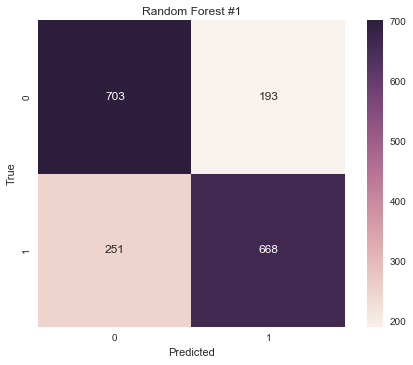

In [20]:
# Confusion matrix on test data
conf_mat = confusion_matrix(y_test, rf_predict)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, xticklabels=unique(y_test), 
            yticklabels=unique(rf_predict))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest #1')

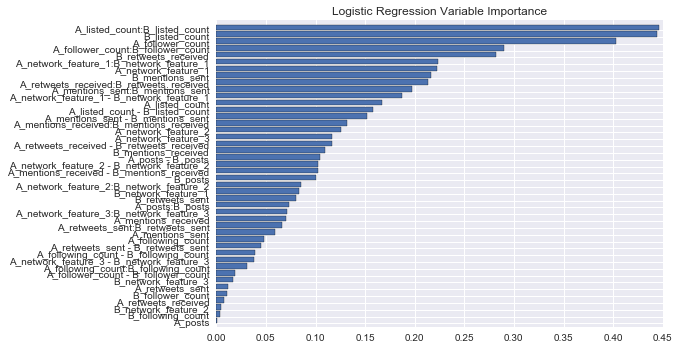

In [78]:
feature_importance = abs(logit.coef_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, X_train[sorted_idx])
plt.title('Logistic Regression Variable Importance')
plt.show()

---

# Aggregate

In [23]:
# Gather predictions from each model for training set
gbTrain_vote = gb.predict(X_train)
rfTrain_vote = rf.predict(X_train)
logitTrain_vote = logit.predict(X_train)

In [24]:
trainDict_vote = {'Gradient Boost': gbTrain_vote, 'Random Forest': rfTrain_vote, 'Logistic Regression': logitTrain_vote}
train_df_vote = pd.DataFrame(trainDict_vote)

testDict_vote = {'Gradient Boost': gb_predict, 'Random Forest': rf_predict, 'Logistic Regressioin': logit_predict}
test_df_vote = pd.DataFrame(testDict_vote)

In [25]:
# Extract probabilities for each training observation
gbTrain_probs = gb.predict_proba(X_train)
gbTrain_probsPos, gbTrain_probsNeg = extract_probs(gbTrain_probs)

rfTrain_probs = rf.predict_proba(X_train)
rfTrain_probsPos, rfTrain_probsNeg = extract_probs(rfTrain_probs)

logitTrain_probs = logit.predict_proba(X_train)
logitTrain_probsPos, logitTrain_probsNeg = extract_probs(logitTrain_probs)

In [26]:
train_dict = {'Gradient Boost': gbTrain_probsPos, 'Random Forest': rfTrain_probsPos, 'Logisitic Regression': logitTrain_probsPos}
train_df = pd.DataFrame(train_dict)

test_dict = {'Gradient Boost': gb_probsPos, 'Random Forest': rf_probsPos, 'Logistic Regression': logit_probsPos}
test_df = pd.DataFrame(test_dict)

### Method 1: Vote

In [27]:
sums = test_df_vote.sum(axis=1)

votes = []
for sum in sums:
    if sum > 1:
        votes.append(1)
    else:
        votes.append(0)

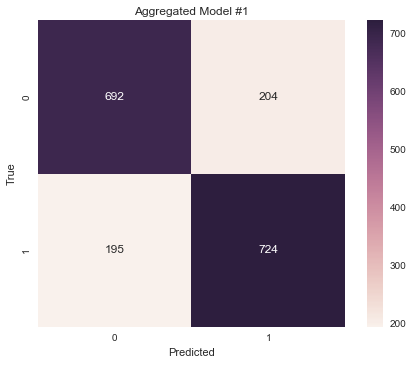

In [28]:
# Confusion matrix on test data
conf_mat = confusion_matrix(y_test, votes)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, xticklabels=unique(y_test), 
            yticklabels=unique(votes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Aggregated Model #1')

In [29]:
print 'Prediction Accuracy\t:\t{}%'.format(100 * float((conf_mat[0,0] + conf_mat[1,1])) / float(conf_mat.sum()))

Prediction Accuracy	:	78.0165289256%


### Method 2: Avg. Prob

In [30]:
avg_probs = test_df.mean(axis=1)

prob_votes = []
for prob in avg_probs:
    if prob > 0.5:
        prob_votes.append(1)
    else:
        prob_votes.append(0)

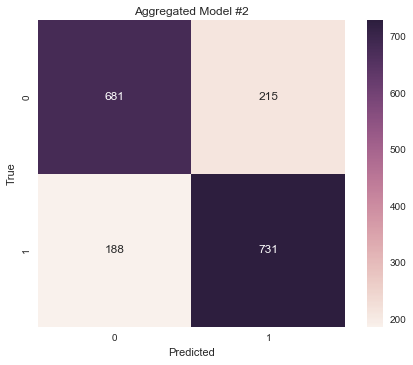

In [31]:
# Confusion matrix on test data
conf_mat = confusion_matrix(y_test, prob_votes)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, xticklabels=unique(y_test), 
            yticklabels=unique(prob_votes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Aggregated Model #2')

In [32]:
print 'Prediction Accuracy\t:\t{}%'.format(100 * float((conf_mat[0,0] + conf_mat[1,1])) / float(conf_mat.sum()))

Prediction Accuracy	:	77.7961432507%


### Method 3: Avg. Prob (Gradient Boost & Logistic Regression Only)

In [33]:
avg_probs = []
for i in range(len(y_test)):
    gb_prob = gb_probsPos[i]
    logit_prob = logit_probsPos[i]
    avg_prob = (gb_prob + logit_prob) / 2
    avg_probs.append(avg_prob)

prob_votes = []
for prob in avg_probs:
    if prob > 0.5:
        prob_votes.append(1)
    else:
        prob_votes.append(0)

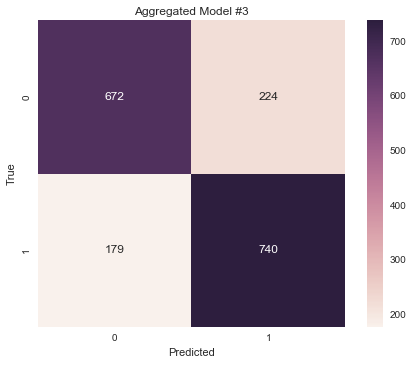

In [34]:
# Confusion matrix on test data
conf_mat = confusion_matrix(y_test, prob_votes)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, xticklabels=unique(y_test), 
            yticklabels=unique(prob_votes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Aggregated Model #3')

In [35]:
print 'Prediction Accuracy\t:\t{}%'.format(100 * float((conf_mat[0,0] + conf_mat[1,1])) / float(conf_mat.sum()))

Prediction Accuracy	:	77.7961432507%


---

# ROC Curve

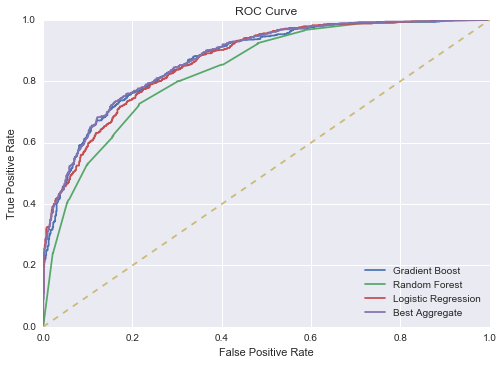

In [37]:
from sklearn.metrics import roc_curve

gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb_probsPos, pos_label=1)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probsPos, pos_label=1)
logit_fpr, logit_tpr, logit_thresholds = roc_curve(y_test, logit_probsPos, pos_label=1)

agg2_fpr, agg2_tpr, agg2_thresholds = roc_curve(y_test, avg_probs, pos_label=1)


x = [0,1]
y = [0,1]

plot(gb_fpr, gb_tpr)
plot(rf_fpr, rf_tpr)
plot(logit_fpr, logit_tpr)
plot(agg2_fpr, agg2_tpr)
plot(x,y, ls='--')
title('ROC Curve')
xlabel('False Positive Rate')
ylabel('True Positive Rate')
legend(['Gradient Boost', 'Random Forest', 'Logistic Regression', 'Best Aggregate'], loc='best')

---

# Results

It appears that our best model is an aggregate between the gradient boost, random forest, and logistic regression. In this model, each individual model gets a vote on whether each observation should be classified as 0 or 1. The model then classifies based on which class received more votes.